# chModeler
 A new approach to the old Hodgkin-Huxley model for: Making all ion channel models comparable.

 This package builds models for ion channels from patch clamp data using Binomial Distribution.

 The default dataset contains ~200 voltage-gated ion channel data from different species with similar experiment conditions where data have been gathered from literature and digitized for modeling and comparision studies.

 This dataset is temporarily available at: http://chopen.herokuapp.com
# Ion Channel Modeling Using chModeler and Binomial Distribution
* **Problems with HH-style models:**
  * Independent m and h when having both activation and inactivation which is in contrast with dependent nature activation and inactivation gating of ion channels
  * No unified equation expressions
    * Different alpha-beta expressions in different models
    * Different inactivation expressions
  * Too many parameters for many models
  * Parameters are varied from one model to the other
  * Many HH models can't describe kinetics very well at different voltages (esp. low voltages)
    * Different powers at different voltages!!
* **Fitting problems:**
  * Finding gmax is so tedious when we have both activation and inactivation
  * Parameter estimation for tau, alpha, and beta is usually not unique when having both activation and inactivation
  * No accurate way to decide how much of a raising current is due to activation and how much for inactivation
  * It's usually hard to find h0 of inactivation
* **Markov models problems:**
  * Complexity
  * Number and types of states
  * Number of parameters
  * And the same problems mentioned above for fitting processes
* **Binomial Distribution And ion Channel Modeling**
  * "In probability theory and statistics, the [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution) with parameters *n* and *p* is the discrete probability distribution of the number of successes in a sequence of *n* independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one (with probability *p*) or failure/no/false/zero (with probability *q = 1 − p*)."

    $$f(k,n,p) = Pr(k;n,p) = Pr(X=k) = \binom{n}{k}p^k(1-p)^{n-k}, \binom{n}{k}=\frac{n!}{k!(n-k)!}$$

  * At microscopic level, each ion channel could be only in one of two positions: either open or close. So, at macroscopic level, we can assume the number of gates in ion channels being in the activated state as a Binomial Distribution.
  * According to the Hodgkin-Huxley equation, the current passing through all (the same) voltage-gated ion channels of a cell can be described as:

    $$I = \bar{g} * Po * (V - E_{rev})$$

  * Where, *Po* is the probability of ion channels being in open state at each time. So, we can write this probability as:

    $$Po = P_{peak} * Pr(3;4,p)$$

  * For each voltage, *P_peak* is the probability of ion channels at their relative peak conductances and *Pr* is the probability of ion channels being in activated state at each time.
  * We can calculate the *P_peak* at each voltage using a Boltzmann function in the form of:

    $$P_{peak} = \frac{1} { 1 + \exp(\frac{-(v - v_{half})} {slope})}$$

  * Experimentally, it has been shown that for many voltage-gated ion channels the rate of activation to inactivation is 3:1. So, we can calculate our Binomial Distribution as:

    $$Pr = \frac{4!}{3!*1!} * p^3 * q^1$$

  * However, in order to consider both types of inactivation (fast and slow), the probability of inactivation is the product of the probability of these two types:

    $$p = 1-q, q = q1*q2$$

  * And each inactivation probability can be described as the following equations which are also being used in current ion channel modeling problems. (Please note that this probability could be 1 for any inactivation type if it's not applicable)

    $$q1 = q1_{\infty}-((q1_{\infty}-q1_{0})*\exp(-(\alpha+\beta)*t))$$

    $$q2 = q2_{\infty}-((q2_{\infty}-q2_{0})*\exp(-(\alpha+c)*t))$$

  * *alpha* and *beta* rates can be calculated as below (and *c* which is a rate constant that also can be 0)

    $$\alpha = r_{\alpha} * \exp(-s_{\alpha}*v)$$

    $$\beta = \frac{r_{\beta}} {1 + \exp(\frac{-(v - vh_{\beta})} {s_{\beta}})}$$

    $$c = r_{c}$$

* **Fitting Data Using chModeler**
  * chModeler solves Independent m and h problem (we have p and 1-p instead)
  * We have only one equation and 10 parameters for all VG ion channel models
  * The new algorithm solves the fitting problems
  * Initial guesses could be both blind and from previous models in DataSet
  * In blind guess method it takes a sec for fitting a model
  * Using previous models a more accurate model could be built in a minute

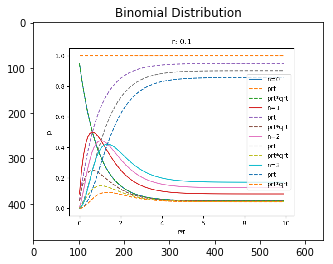

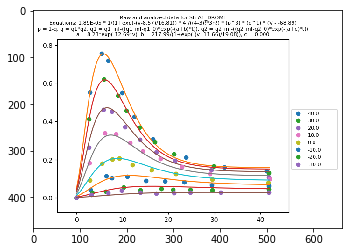

 ## Installation
To install and run this project within current notebook run the following cell (make sure you are using python >= 3.4):

In [2]:
import sys
!{sys.executable} -m pip install .


 ## Usage
You can run `python3 chModeler.py -h` for command-line usage help.

In [3]:
import sys
!{sys.executable} chModeler.py -h


usage: chModeler.py [-h] [-w] [-ft FIT_TYPE] [-dt DATASET_TYPE] [-dh DS_HOST]
                    [-df DS_FILE] [-mf MODEL_FILE] [-r2 R2]
                    [-i ION_CHANNEL_ID] [-ti TIME_ID] [-p PLOT]
                    [-fp FINAL_PLOT] [-s SAVE] [-sp SAVE_PATH]

Build models for ion channels from patch clamp data.

optional arguments:
  -h, --help            show this help message and exit
  -w, --wizard          Run wizard for modeler options.
  -ft FIT_TYPE, --fit_type FIT_TYPE
                        fitting type, 1: Blind Guess(quick), 2: Using previous
                        models
  -dt DATASET_TYPE, --dataset_type DATASET_TYPE
                        dataset, 1: Default existing data, 2: From web, 3:
                        From file
  -dh DS_HOST, --ds_host DS_HOST
                        dataset host
  -df DS_FILE, --ds_file DS_FILE
                        dataset file path
  -mf MODEL_FILE, --model_file MODEL_FILE
                        An specific model file path to ini

There are 3 ways to initiate running chModeler:
* Sending command arguments to chModeler directly:


In [4]:
%%time
# Build model for ion channel No.5 in dataset and save the model in /data directory using default options.
!{sys.executable} chModeler.py -i 5


In [5]:
%%time
# Do not save results and show plots for each fitting steps (True/1 and False/0 can be used alternatively)
!{sys.executable} chModeler.py -i 5 -s False -p True


In [6]:
%%time
# Use previous models to fit the model with r2 score threshold of 0.98 (increase r2 (e.g. 0.999) for a smaller but faster initial state.)
!{sys.executable} chModeler.py -i 5 -ft 2 -r2 0.98


In [7]:
%%time
# Use the model located in data/2ndFit/18_Sh-B1_DROME_10p_2.json to fit and plot only final results
!{sys.executable} chModeler.py -i 5 -ft 2 -s 0 -fp 1 -mf "data\2ndFit\18_Sh-B1_DROME_10p_2.json"


 * Reading command arguments from a file:


In [8]:
%%time
# Read the arguments from args.txt file
!{sys.executable} chModeler.py "@args.txt"


 * Running the wizard for answering questions and entering the options:


In [9]:
# !{sys.executable} chModeler.py -w

